In [ ]:
import sys
import os
current_dir = os.getcwd()
root_dir = os.path.dirname(current_dir)
sys.path.insert(0, str(root_dir))

from spatialzoomer import SubclusterAnalysis
import numpy as np
import pandas as pd
import scanpy as sc

import warnings
warnings.filterwarnings("ignore")

## read h5ad data processed by SpatialZoomer

In [4]:
dataset = "Xenium_Prime_Ovarian_Cancer_FFPE"
ad = sc.read_h5ad("E:/SZ/Results/" + dataset + "/" + dataset + "_GWT_anndata.h5ad")

# use cell type labels from the original dataset
if dataset == "Xenium_Prime_Ovarian_Cancer_FFPE":
    celltype = pd.read_csv("E:/SZ/Results/" + dataset + "/Xenium_Prime_Ovarian_Cancer_FFPE_cell_groups.csv")
    obs_df = ad.obs.copy()
    merged_df = obs_df.merge(celltype[['cell_id', 'group']], on='cell_id', how='left')
    ad.obs = merged_df

    ad.obs['Cell_Type'] = ad.obs['group']

# sc.pp.subsample(ad, n_obs=10000, random_state=0)
ad

AnnData object with n_obs × n_vars = 397855 × 5099
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level', 'cell_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'n_genes', 'Kmeans_Raw', 'leiden_Raw_res0.4', 'leiden_Raw_res0.6', 'leiden_Raw_res0.8', 'leiden_Raw_res1', 'leiden_Raw_res1.2', 'Kmeans_scale0.01', 'leiden_scale0.01_res0.4', 'leiden_scale0.01_res0.6', 'leiden_scale0.01_res0.8', 'leiden_scale0.01_res1', 'leiden_scale0.01_res1.2', 'Kmeans_scale0.6', 'leiden_scale0.6_res0.4', 'leiden_scale0.6_res0.6', 'leiden_scale0.6_res0.8', 'leiden_scale0.6_res1', 'leiden_scale0.6_res1.2', 'Kmeans_scale1.2', 

## Instantiation SubclusterAnalysis object

In [5]:
save_path = "./results/" + dataset + "_lowres/"
subcluster_analyzer = SubclusterAnalysis(ad, save_path, cluster_key="Cell_Type")

## Subcluster detection

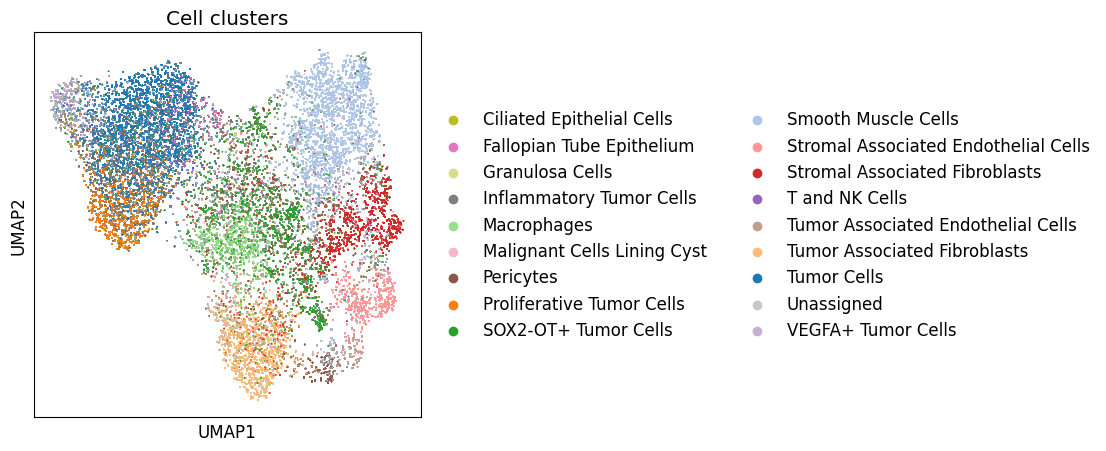

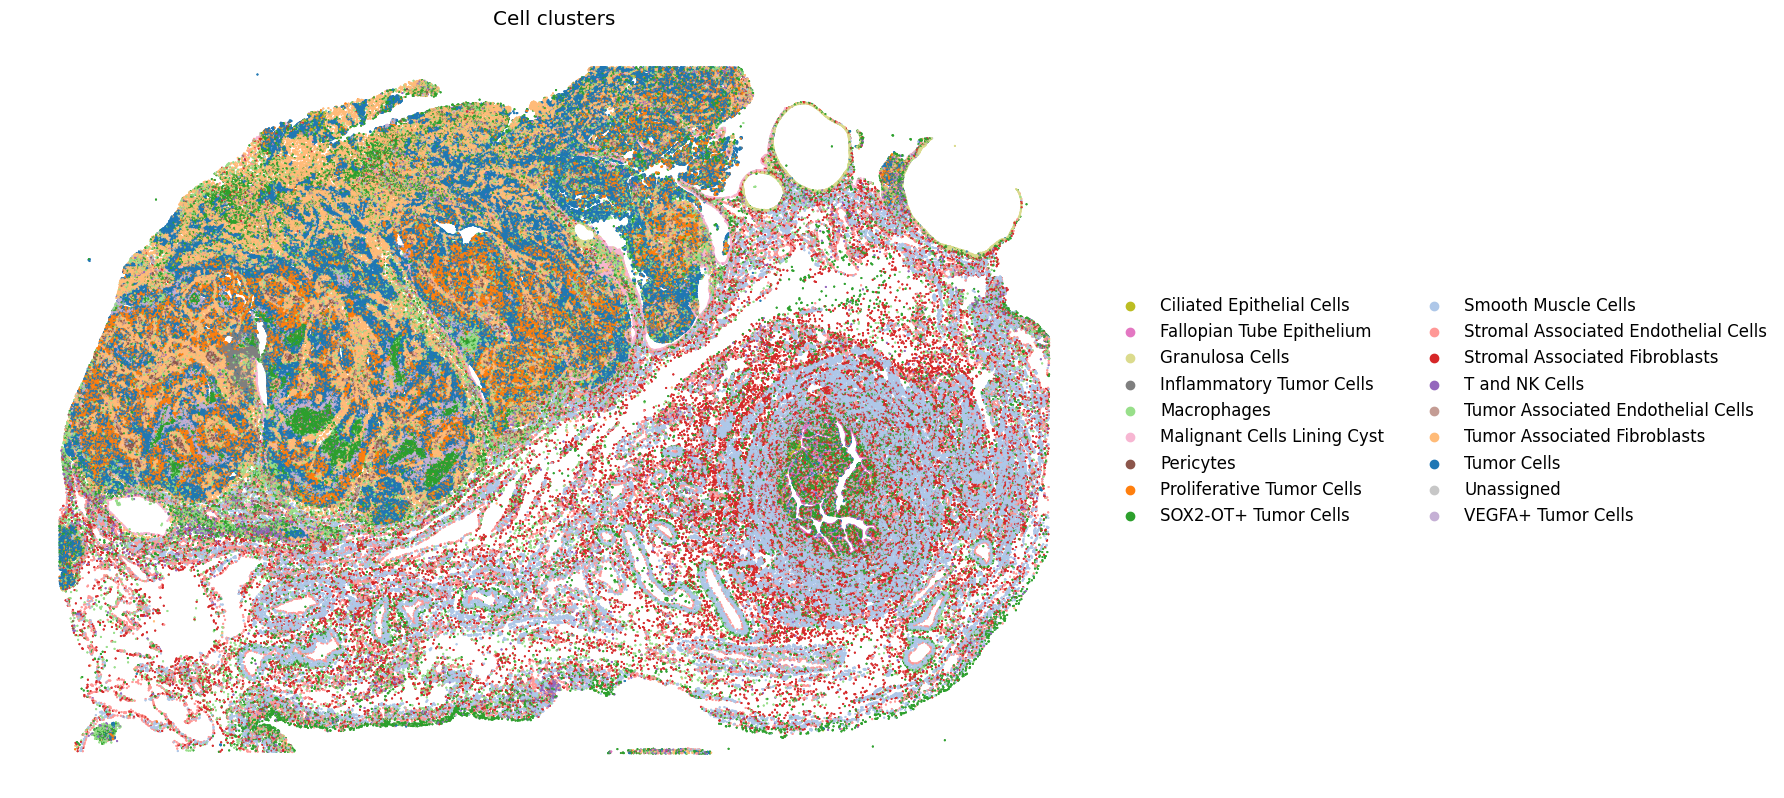

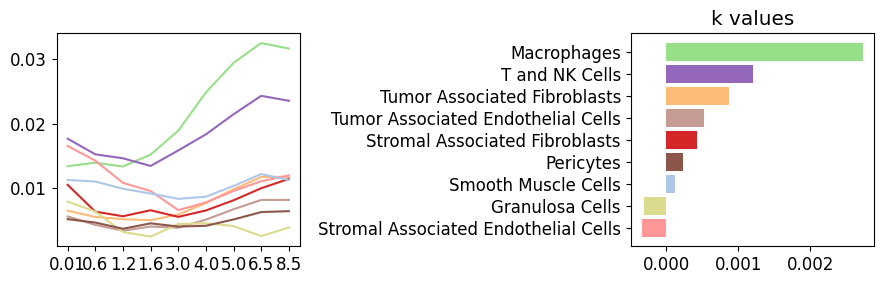

Suggested cluster:  Macrophages


In [8]:
subcluster_analyzer.calculate_metrics(nonepi=True, plot_spatial=True)

Selected cluster: Tumor Associated Fibroblasts


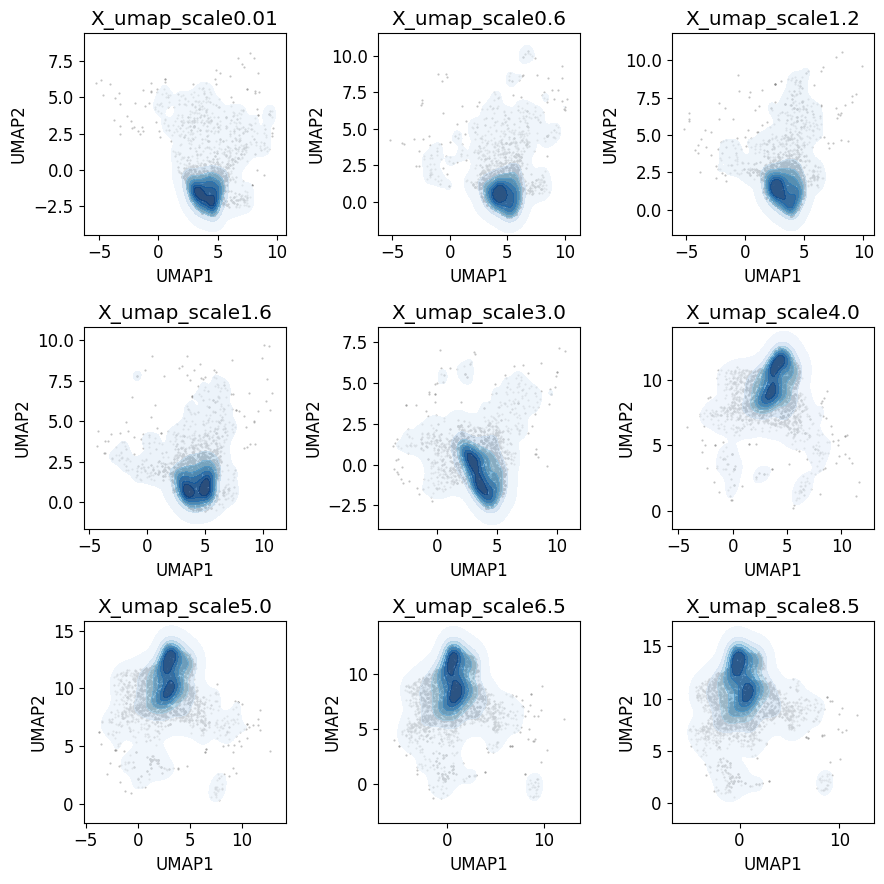

In [9]:
subcluster_analyzer.selected_cluster = "Tumor Associated Fibroblasts"
subcluster_analyzer.kde_plot()

In [10]:
subcluster_analyzer.find_optimal_scale()

Optimal scale for cluster Tumor Associated Fibroblasts is 6.5


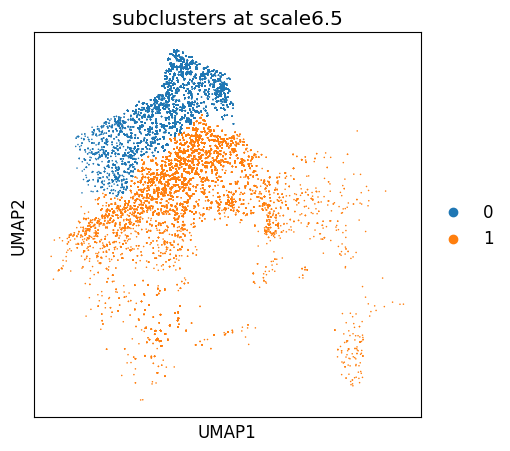

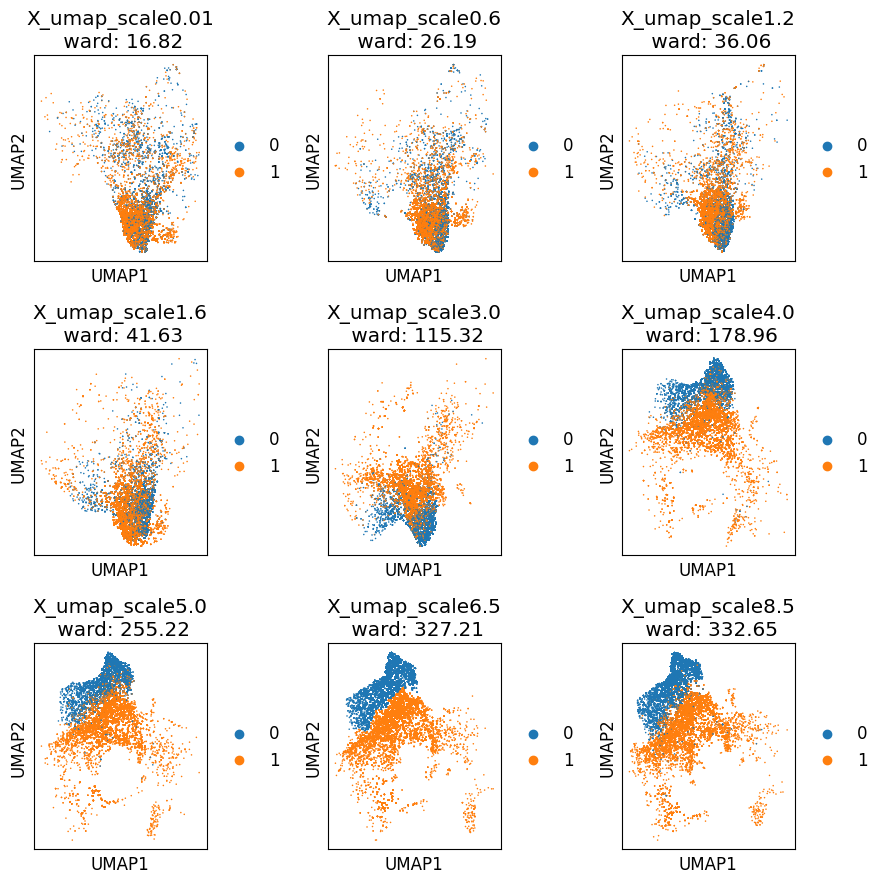

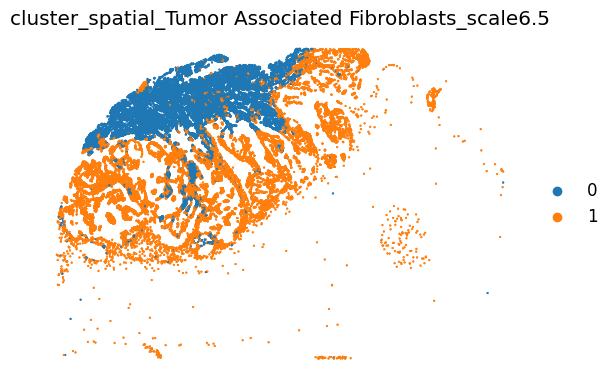

In [11]:
# # manually set the optimal scale here, if not, automatically set as the suggested one
# subcluster_analyzer.optimal_scale = 4.5
subcluster_analyzer.detect_subclusters(n_clusters=2, plot_all_scales=True, calculate_ward=True, plot_spatial=True)

## Differential analysis between subclusters

saving DEG results for subcluster 0
saving DEG results for subcluster 1


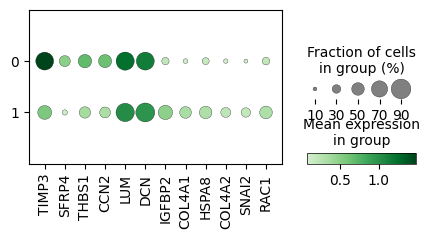

In [12]:
subcluster_analyzer.deg_analysis_subclusters(dotplot=True)

Saving cell type labels with subcluster labels...


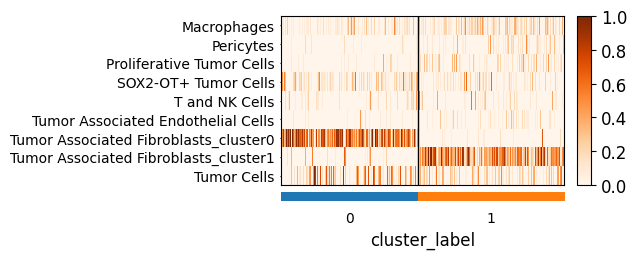

In [13]:
subcluster_analyzer.neighborhood_analysis(k=20)

p-value for nucleus_count: 6.18e-18
p-value for nucleus_area: 3.33e-19
p-value for cell_area: 1.15e-01
p-value for Cell_Perimeter: 2.87e-01
p-value for Cell_Area: 1.08e-01
p-value for Cell_Solidity: 6.42e-02
p-value for Cell_Convexity: 7.60e-03
p-value for Density_R20: 1.18e-23


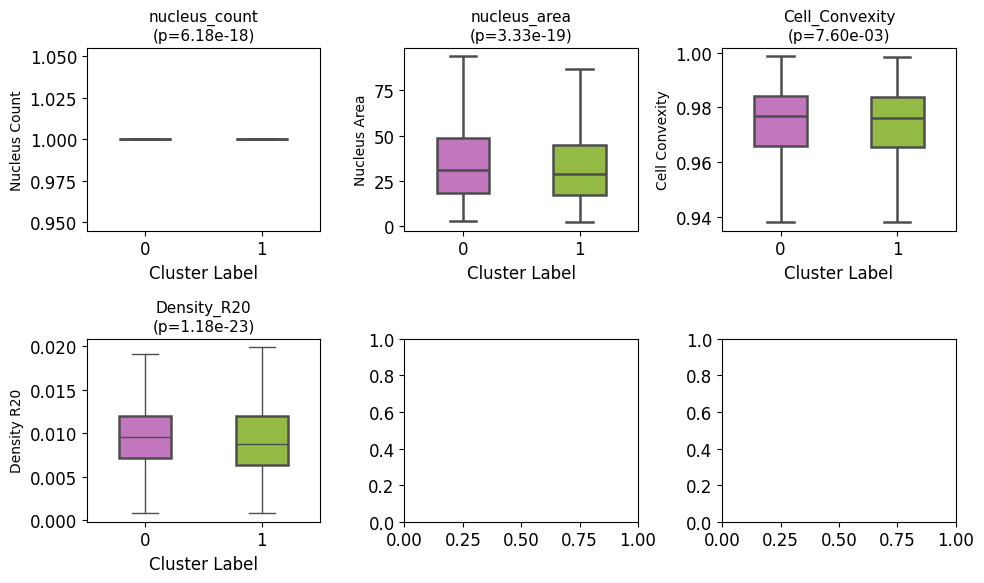

In [14]:
# revised density
morphology_path = "E:/SZ/Results/morphology/" + dataset + "_morphology_revise_density.csv"
morphology_df = pd.read_csv(morphology_path, index_col=0)
subcluster_analyzer.morphology_analysis(morphology_df)

In [15]:
subcluster_analyzer.ad.write(save_path + "ad_processed.h5ad")
subcluster_analyzer.ad_selected.write(save_path + "ad_selected.h5ad")
subcluster_analyzer.ad_selected_plot.write(save_path + "ad_selected_plot.h5ad")

In [7]:
ad_selected_plot = sc.read_h5ad(save_path + "ad_selected_plot.h5ad")
ad_selected_plot.uns['cluster_label_colors'] = ['#CD69C9', '#9ACD32']

In [12]:
morphology_path = "E:/SZ/Results/morphology/" + dataset + "_morphology_revise_density.csv"
morphology = pd.read_csv(morphology_path, index_col=0)
morphology.index = ad.obs.index
morphology

,Cell_Type,nucleus_count,nucleus_area,cell_area,Cell_Perimeter,Cell_Area,Cell_Solidity,Cell_Convexity,Density_R20
0,C1,1.0,31.835157,44.659533,26.478390,42.153512,0.945800,0.983392,0.015915
1,C0,1.0,38.247345,57.664533,28.568522,55.203503,0.981138,0.992045,0.014324
2,C1,1.0,27.590470,39.827814,24.412023,37.818269,0.962104,0.985211,0.016711
3,C1,1.0,38.879533,60.870627,29.315615,57.506514,0.947197,0.983329,0.016711
4,C0,1.0,46.510939,50.484689,27.214898,47.933641,0.941464,0.983761,0.017507
...,...,...,...,...,...,...,...,...,...
397850,C5,1.0,11.018125,135.423599,41.735919,131.876992,0.990337,0.997287,0.001592
397851,C4,1.0,5.102656,109.820004,37.575411,106.208143,0.986353,0.995216,0.001592
397852,C5,1.0,6.728281,40.324533,23.238527,38.633434,0.991270,0.993740,0.003183
397853,C5,1.0,11.469688,135.197817,41.540068,132.080838,0.993375,0.998689,0.001592


p-value for nucleus_count: 1.35e-01
p-value for nucleus_area: 0.00e+00
p-value for cell_area: 0.00e+00
p-value for Cell_Perimeter: 0.00e+00
p-value for Cell_Area: 0.00e+00
p-value for Cell_Solidity: 2.84e-05
p-value for Cell_Convexity: 1.99e-24
p-value for Density_R20: 1.81e-12


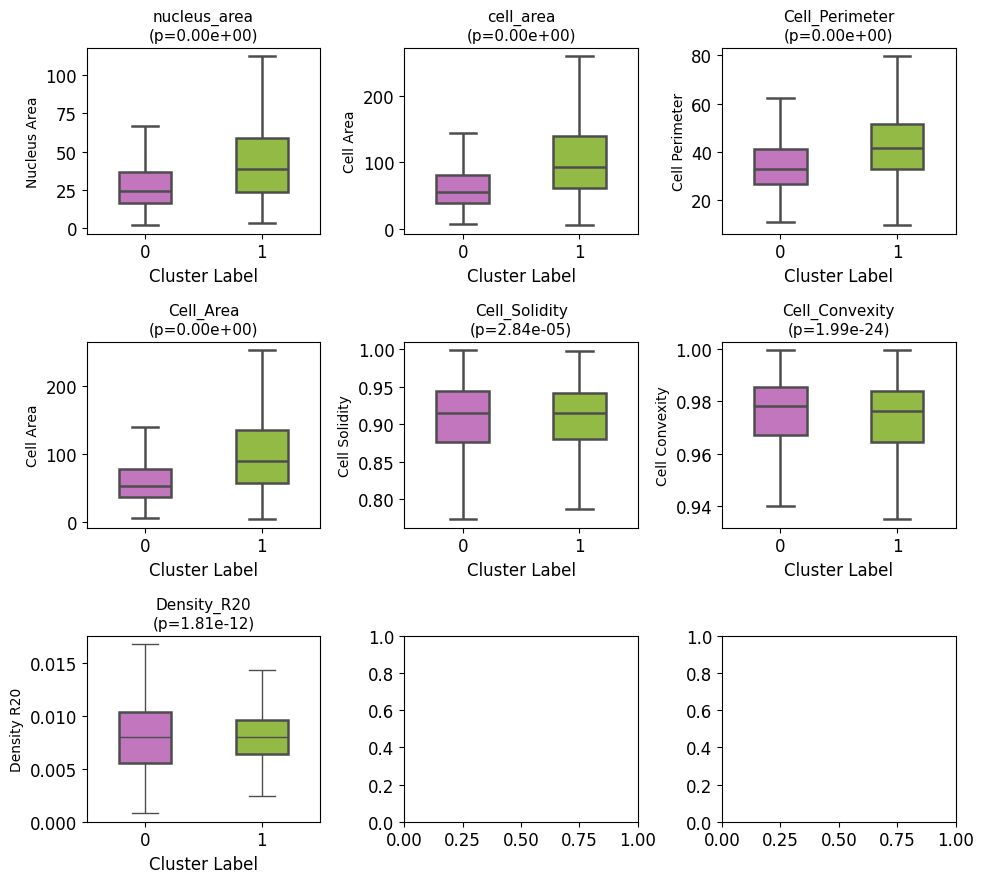

In [13]:
subcluster_analyzer.ad_selected_plot = ad_selected_plot
subcluster_analyzer.morphology_analysis(morphology)

p-value for nucleus_count: 1.35e-01
p-value for nucleus_area: 0.00e+00
p-value for cell_area: 0.00e+00
p-value for Cell_Perimeter: 0.00e+00
p-value for Cell_Area: 0.00e+00
p-value for Cell_Solidity: 2.84e-05
p-value for Cell_Convexity: 1.99e-24
p-value for Relative_Cell_Area: 0.00e+00
p-value for Relative_Cell_Perimeter: 0.00e+00
p-value for Cell_Circularity: 1.21e-205
p-value for Cell_Length: 0.00e+00
p-value for Cell_Width: 0.00e+00
p-value for Cell_Aspect_Ratio: 0.00e+00
p-value for Cell_Eccentricity: 2.42e-243
p-value for Cell_Symmetry: 1.76e-01
p-value for Cell_Major_Axis_Sin: 0.00e+00
p-value for Density_R20: 2.84e-33
p-value for Nucleus_Perimeter: 0.00e+00
p-value for Nucleus_Area: 0.00e+00
p-value for Nucleus_Solidity: 5.57e-306
p-value for Nucleus_Convexity: 4.46e-49
p-value for Relative_Nucleus_Area: 0.00e+00
p-value for Relative_Nucleus_Perimeter: 0.00e+00
p-value for Nucleus_Circularity: 0.00e+00
p-value for Nucleus_Length: 8.81e-148
p-value for Nucleus_Width: 0.00e+00
p-va

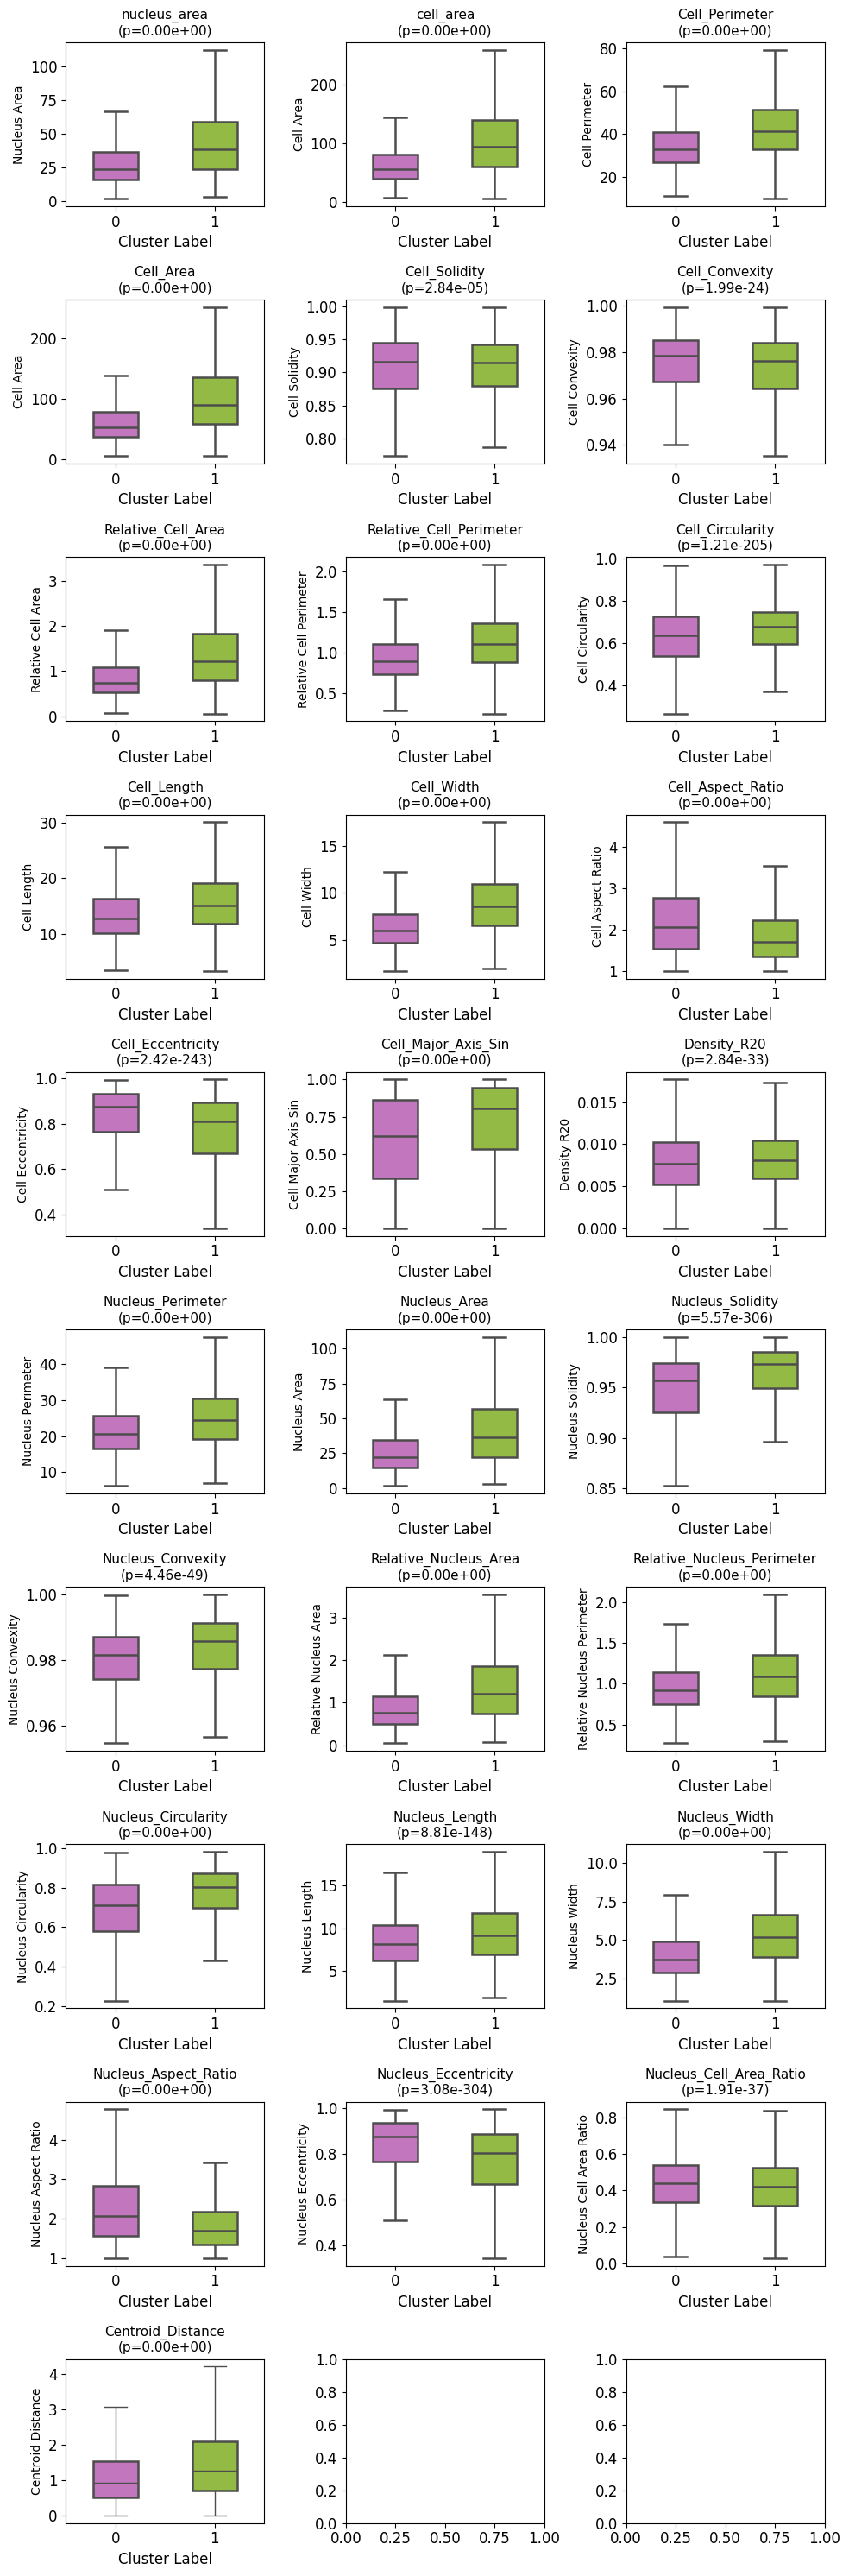

In [14]:
morphology_path = "E:/SZ/Results/morphology/" + dataset + "_morphology_information.csv"
morphology = pd.read_csv(morphology_path, index_col=0)
morphology.index = ad.obs.index
subcluster_analyzer.ad_selected_plot = ad_selected_plot
subcluster_analyzer.morphology_analysis(morphology)